In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist datasetini yüklemek için gerekli...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [8]:

# Bu işlem 1-2 dk sürebilir..
mnist = fetch_openml('mnist_784')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [19]:
type(mnist)

sklearn.utils._bunch.Bunch

In [22]:
type(mnist.data)

pandas.core.frame.DataFrame

In [10]:
mnist.data.shape

(70000, 784)

In [11]:
# Parametre olarak dataframe ve ilgili veri fotoğrafının index numarasını alsın..
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

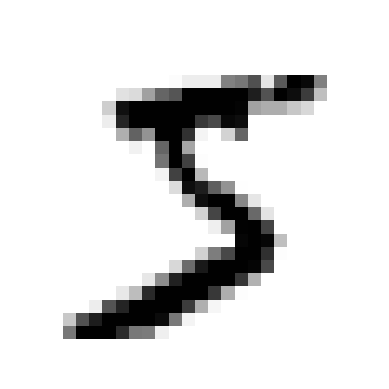

In [16]:
showimage(mnist.data, 0)

In [23]:

# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [25]:
type(train_img)

pandas.core.frame.DataFrame

In [26]:
type(test_img)

pandas.core.frame.DataFrame

In [28]:
type(train_lbl)

pandas.core.series.Series

In [31]:
# Rakam tahminlerimizi check etmek için train_img dataframeini kopyalıyoruz, çünkü az sonra değişecek..
test_img_copy = test_img.copy()

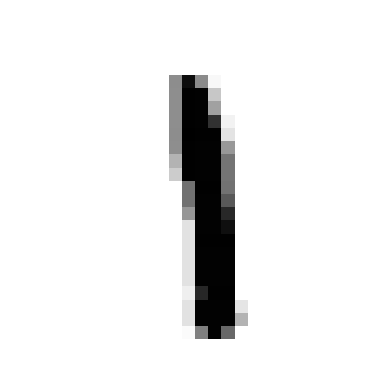

In [32]:
showimage(test_img_copy, 2)

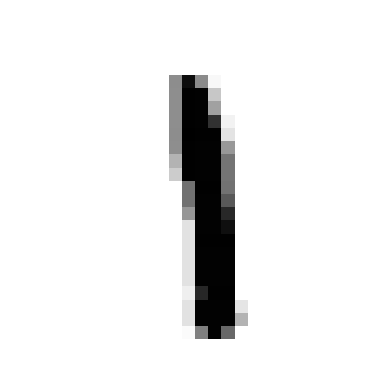

In [33]:
showimage(test_img, 2)

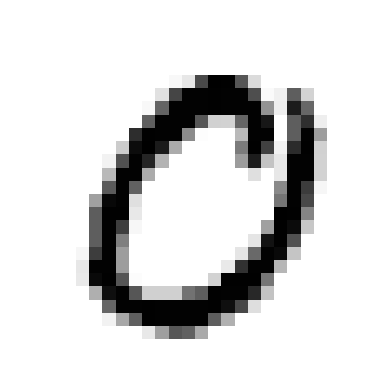

In [34]:
showimage(train_img, 2)

In [38]:
scaler = StandardScaler()

# Scaler'ı sadece training set üzerinde fit yapmamız yeterli..
scaler.fit(train_img)

# Ama transform işlemini hem training sete hem de test sete yapmamız gerekiyor..
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [39]:
pca = PCA(.95)


In [40]:
# PCA'i sadece training sete yapmamız yeterli
pca.fit(train_img)

PCA(n_components=0.95)

In [41]:
# Bakalım 784 boyutu kaç boyuta düşürebilmiş (%95 variance'ı koruyarak tabiiki)
print(pca.n_components_)

327


In [42]:
# Şimdi transform işlemiyle hem train hem de test veri setimizin boyutlarını 784'ten 327'e düşürelim:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [43]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solverı seçerek logisticregression nesnemizi oluşturuyoruz.
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [44]:
# (Birkaç dk sürebilir)
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [45]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

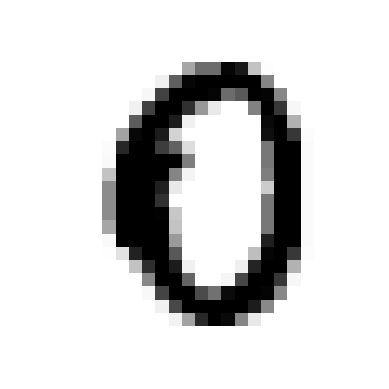

In [46]:
showimage(test_img_copy, 0)

In [47]:
logisticRegr.score(test_img, test_lbl)

0.9184